## Projeto da disciplina aprendizado não supervisionado

### Aluno: Gabriel Angelo Bassetti Machado

#### 1.0 - Importando bibliotecas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
from ydata_profiling import ProfileReport
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_samples, silhouette_score

#### 2.0 - Importando e tratando informações para utilização.

In [2]:
url = (r'Country-data.csv')

In [3]:
df = pd.read_csv(url)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Country-data.csv'

In [ ]:
df_1 = df.copy()
df_1 = df_1[df_1.columns[1:]]

df_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### 3.0 Construindo modelos

3.1 - Preparando os dados para utilização:

- Padronização;
- Variáveis;
- Funções utilizadas.

In [ ]:
# report_df1 = ProfileReport(df_1)

# report_df1

O conjunto não apresenta dados duplicados e também não apresenta não apresenta valores faltantes, sendo possível utilizar todos os dados com segurança.

In [ ]:
# Padronização dos dados e criando modelo

Scaler = StandardScaler().fit(df_1)

In [ ]:
X = Scaler.transform(df_1)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
def plot_histograma(dataframe, features):
  
    
    # Configuração do estilo Seaborn (opcional)
    sns.set(style="whitegrid")

    # Configuração do layout dos subplots
    num_plots = len(features)
    num_cols = 2  # Defina o número desejado de colunas
    num_rows = -(-num_plots // num_cols)  # Cálculo de linhas necessárias

    # Configuração do tamanho do gráfico
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    # Certifica-se de que axes é sempre um array, mesmo que num_plots seja 1
    if num_plots == 1:
        axes = [axes]

    # Itera sobre as colunas e plota os histogramas
    for col, ax in zip(features, [item for sublist in axes for item in sublist]):
        sns.histplot(dataframe[col], ax=ax, kde=True)
        ax.set_title(f'Histograma de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequência')

    # Ajusta o layout final
    plt.tight_layout()
    plt.show()

3.2 Kmeans

In [ ]:
kmeans = KMeans(n_clusters= 3).fit(X)

c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
y_kmeans = kmeans.predict(X)
y_kmeans

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [ ]:
silhouete_kmeans = silhouette_score(X, y_kmeans)

silhouete_kmeans

0.28329575683463126

3.3 Hierarchical Clustering

In [ ]:
hier_cust = AgglomerativeClustering(n_clusters= 3).fit(X)

In [ ]:
y_hc = hier_cust.fit_predict(X)

y_hc

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [ ]:
silhouete_hc = silhouette_score(X, y_hc)

silhouete_hc

0.24563001303300652

#### 4.0 Respondendo algumas perguntas.

4.1 Quantos países existem no dataset?

In [ ]:
df["country"].unique().size

167

O dataset possui 167 países distintos.

4.2 Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
features_plot_df = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

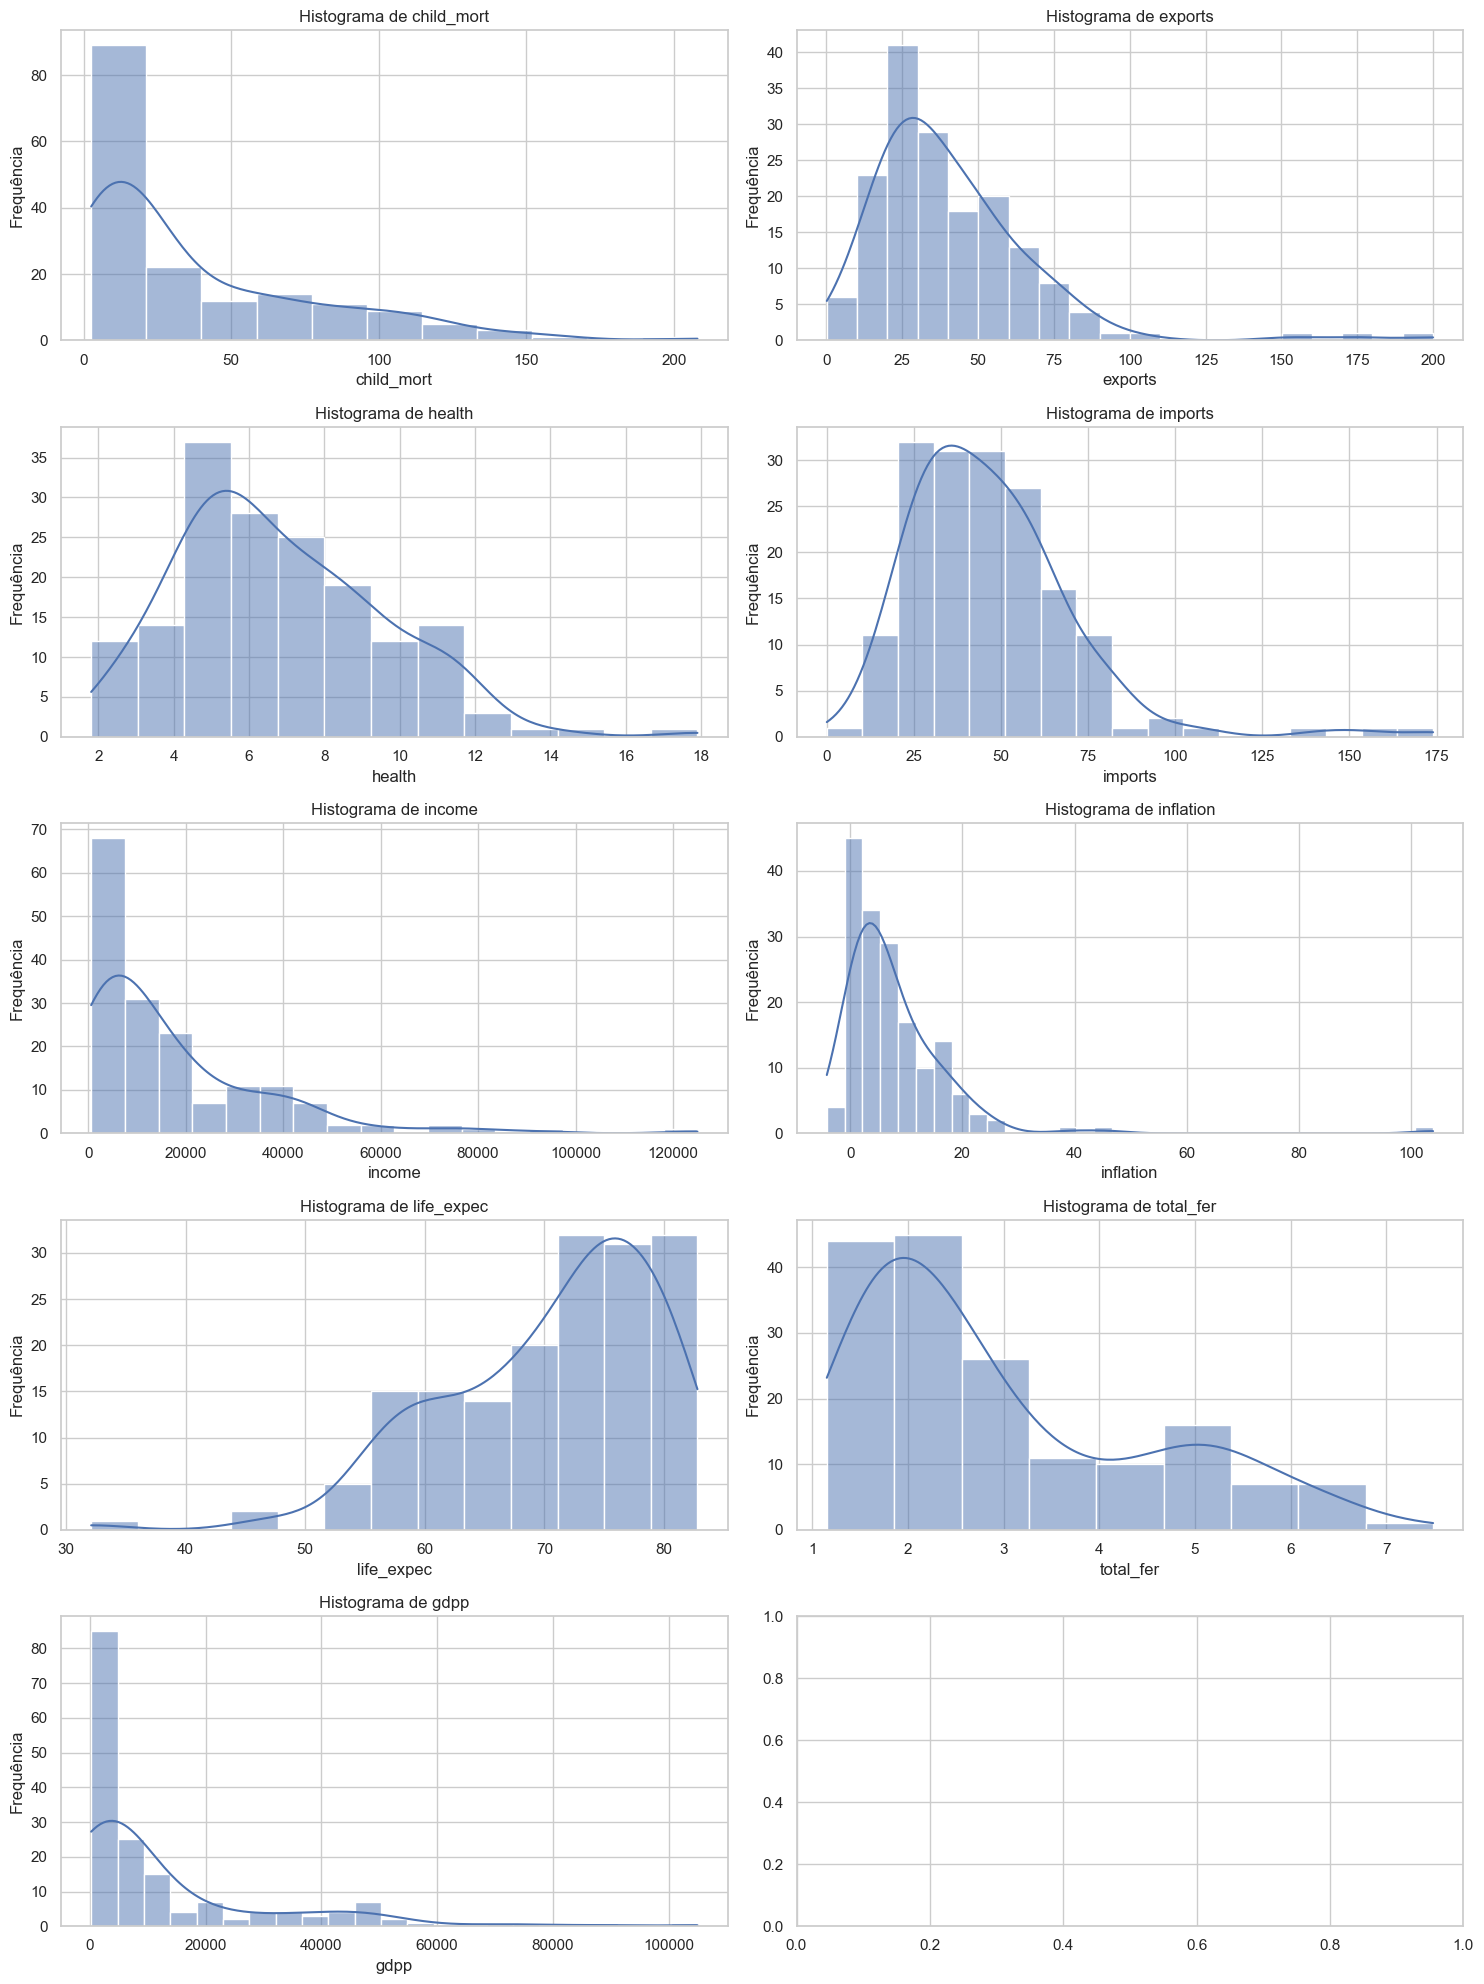

In [ ]:
plot_histograma(df,features_plot_df)

Antes de uma clusterização é importante realizar alguns passos no DataFrame para melhorarmos a qualidade dos dados, como por exemplo:

- Verificar se tem valores nulos e se é possível tratá-los;
- Verificar se tem dados com valores zerados,  é possível tratá-los;
- Verificar se tem linhas duplicadas, caso tenha, analisar se realmente são duplicadas, caso seja, removê-las;
- Transformar dados categóricos em números para poderem ser utilizados como features;
- Verificar se é possível criar novas features, utilizando por exemplo, razões, médias, contagens e etc;
- Realizar padronização dos dados.

4.3 Qual a distribuição das dimensões em cada grupo utilizando K-Means?

In [ ]:
df_2 = df.copy()

In [ ]:
df_2['cluster'] = y_kmeans

df_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [ ]:
df_2.groupby('cluster').size()

cluster
0    36
1    84
2    47
dtype: int64

In [ ]:
df_custler_0 = df_2[df_2['cluster'] == 0]

df_custler_0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0


In [ ]:
df_custler_1 = df_2[df_2['cluster'] == 1]

df_custler_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1


In [ ]:
df_custler_2 = df_2[df_2['cluster'] == 2]

df_custler_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,2
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,2
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,2


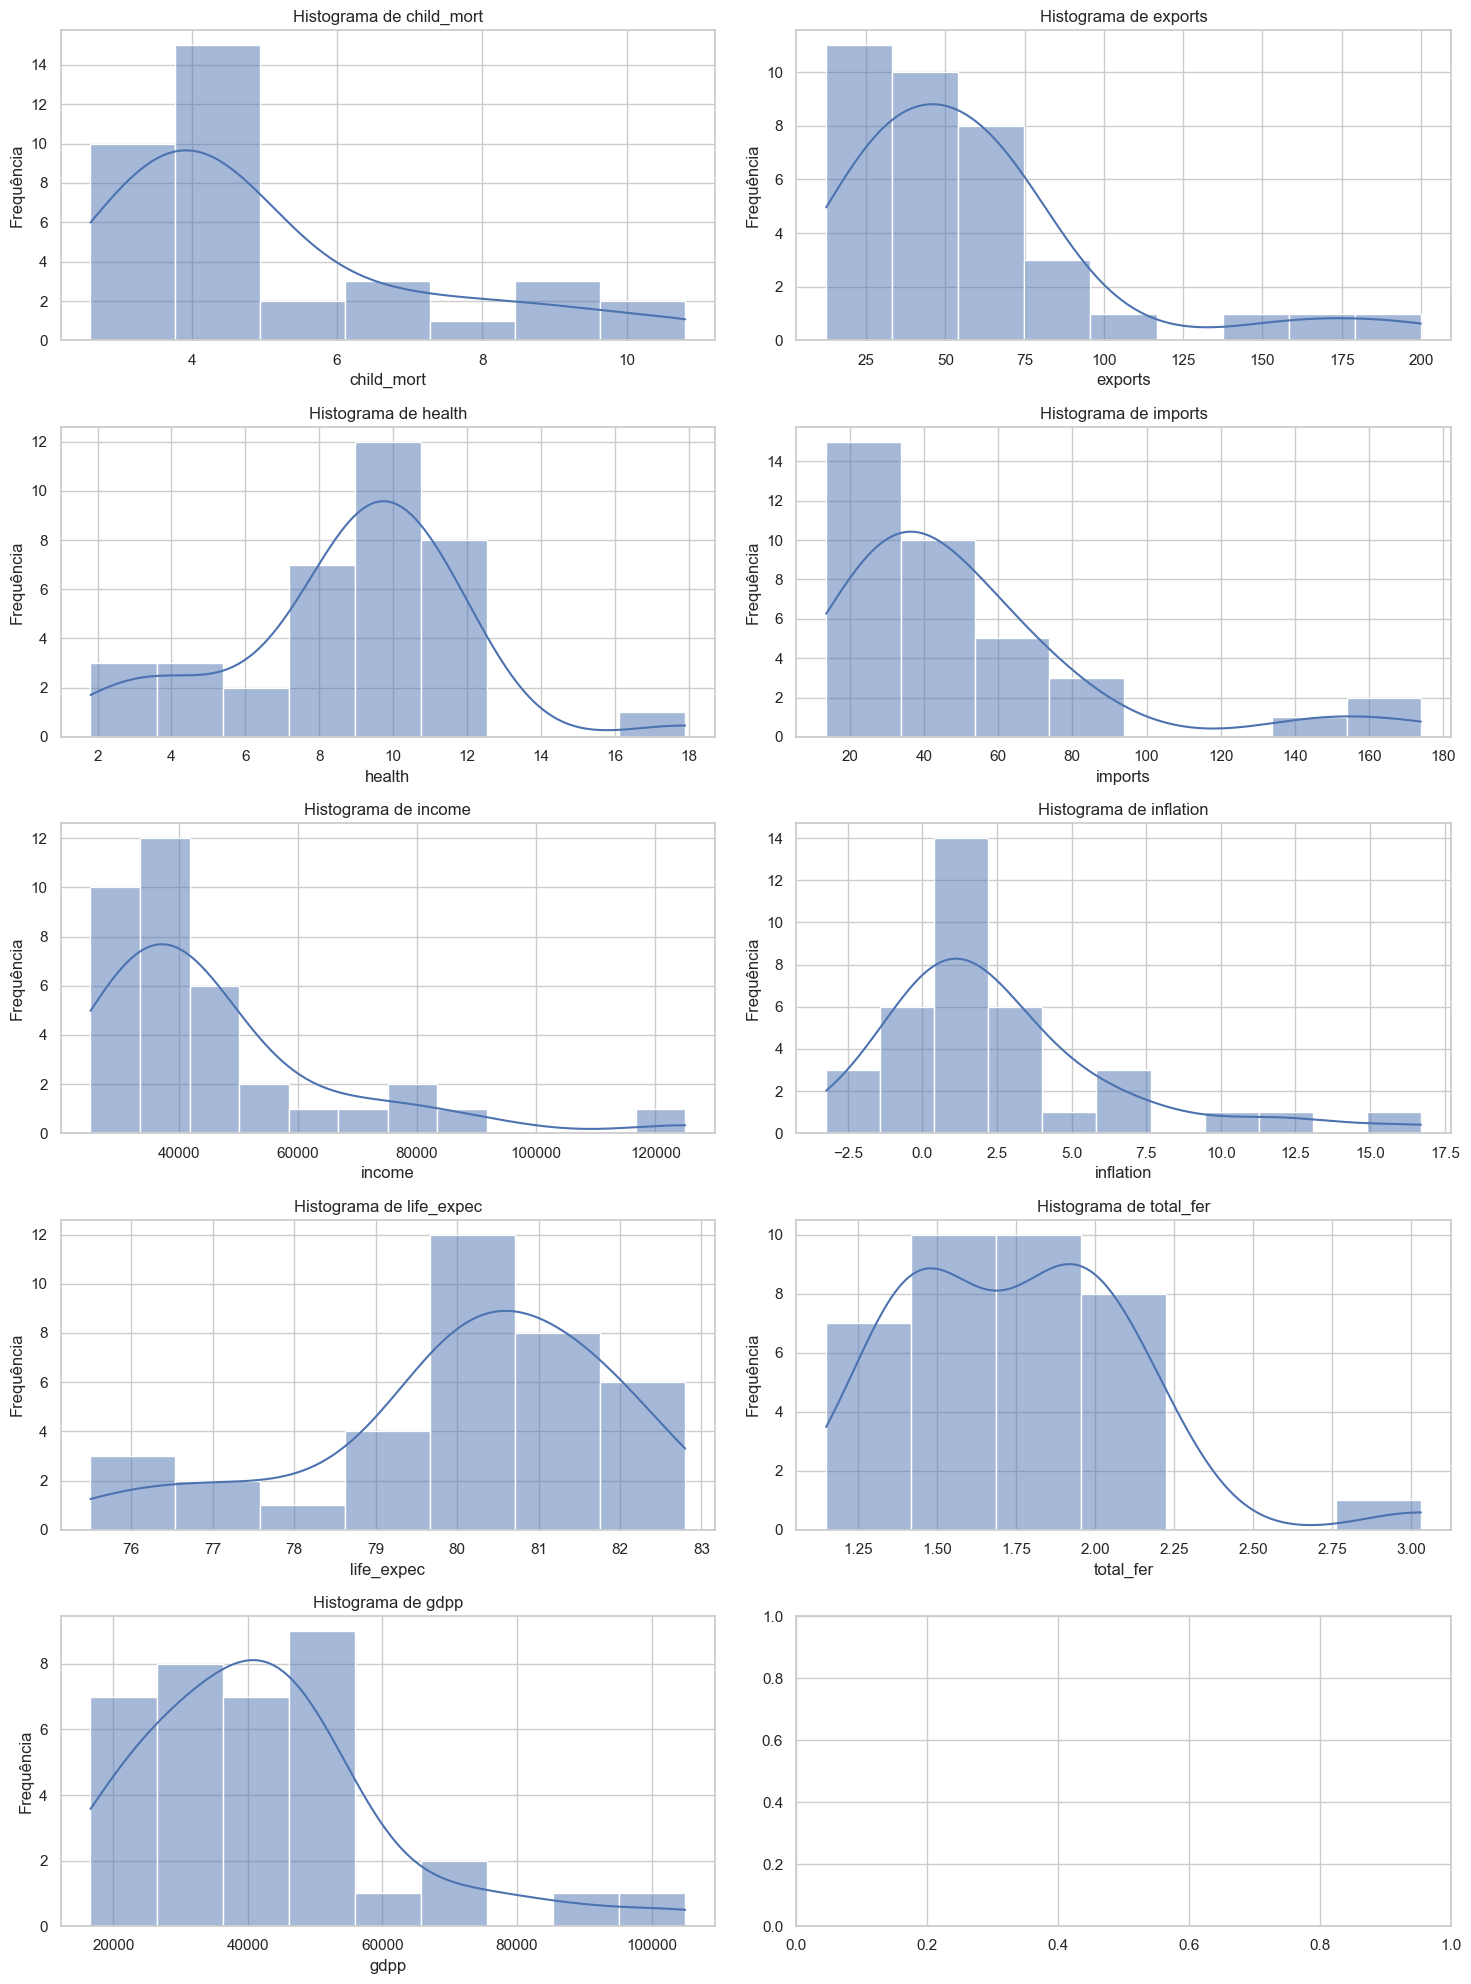

In [ ]:
# Distribuição das features no Cluster 0

plot_histograma(df_custler_0,features_plot_df)

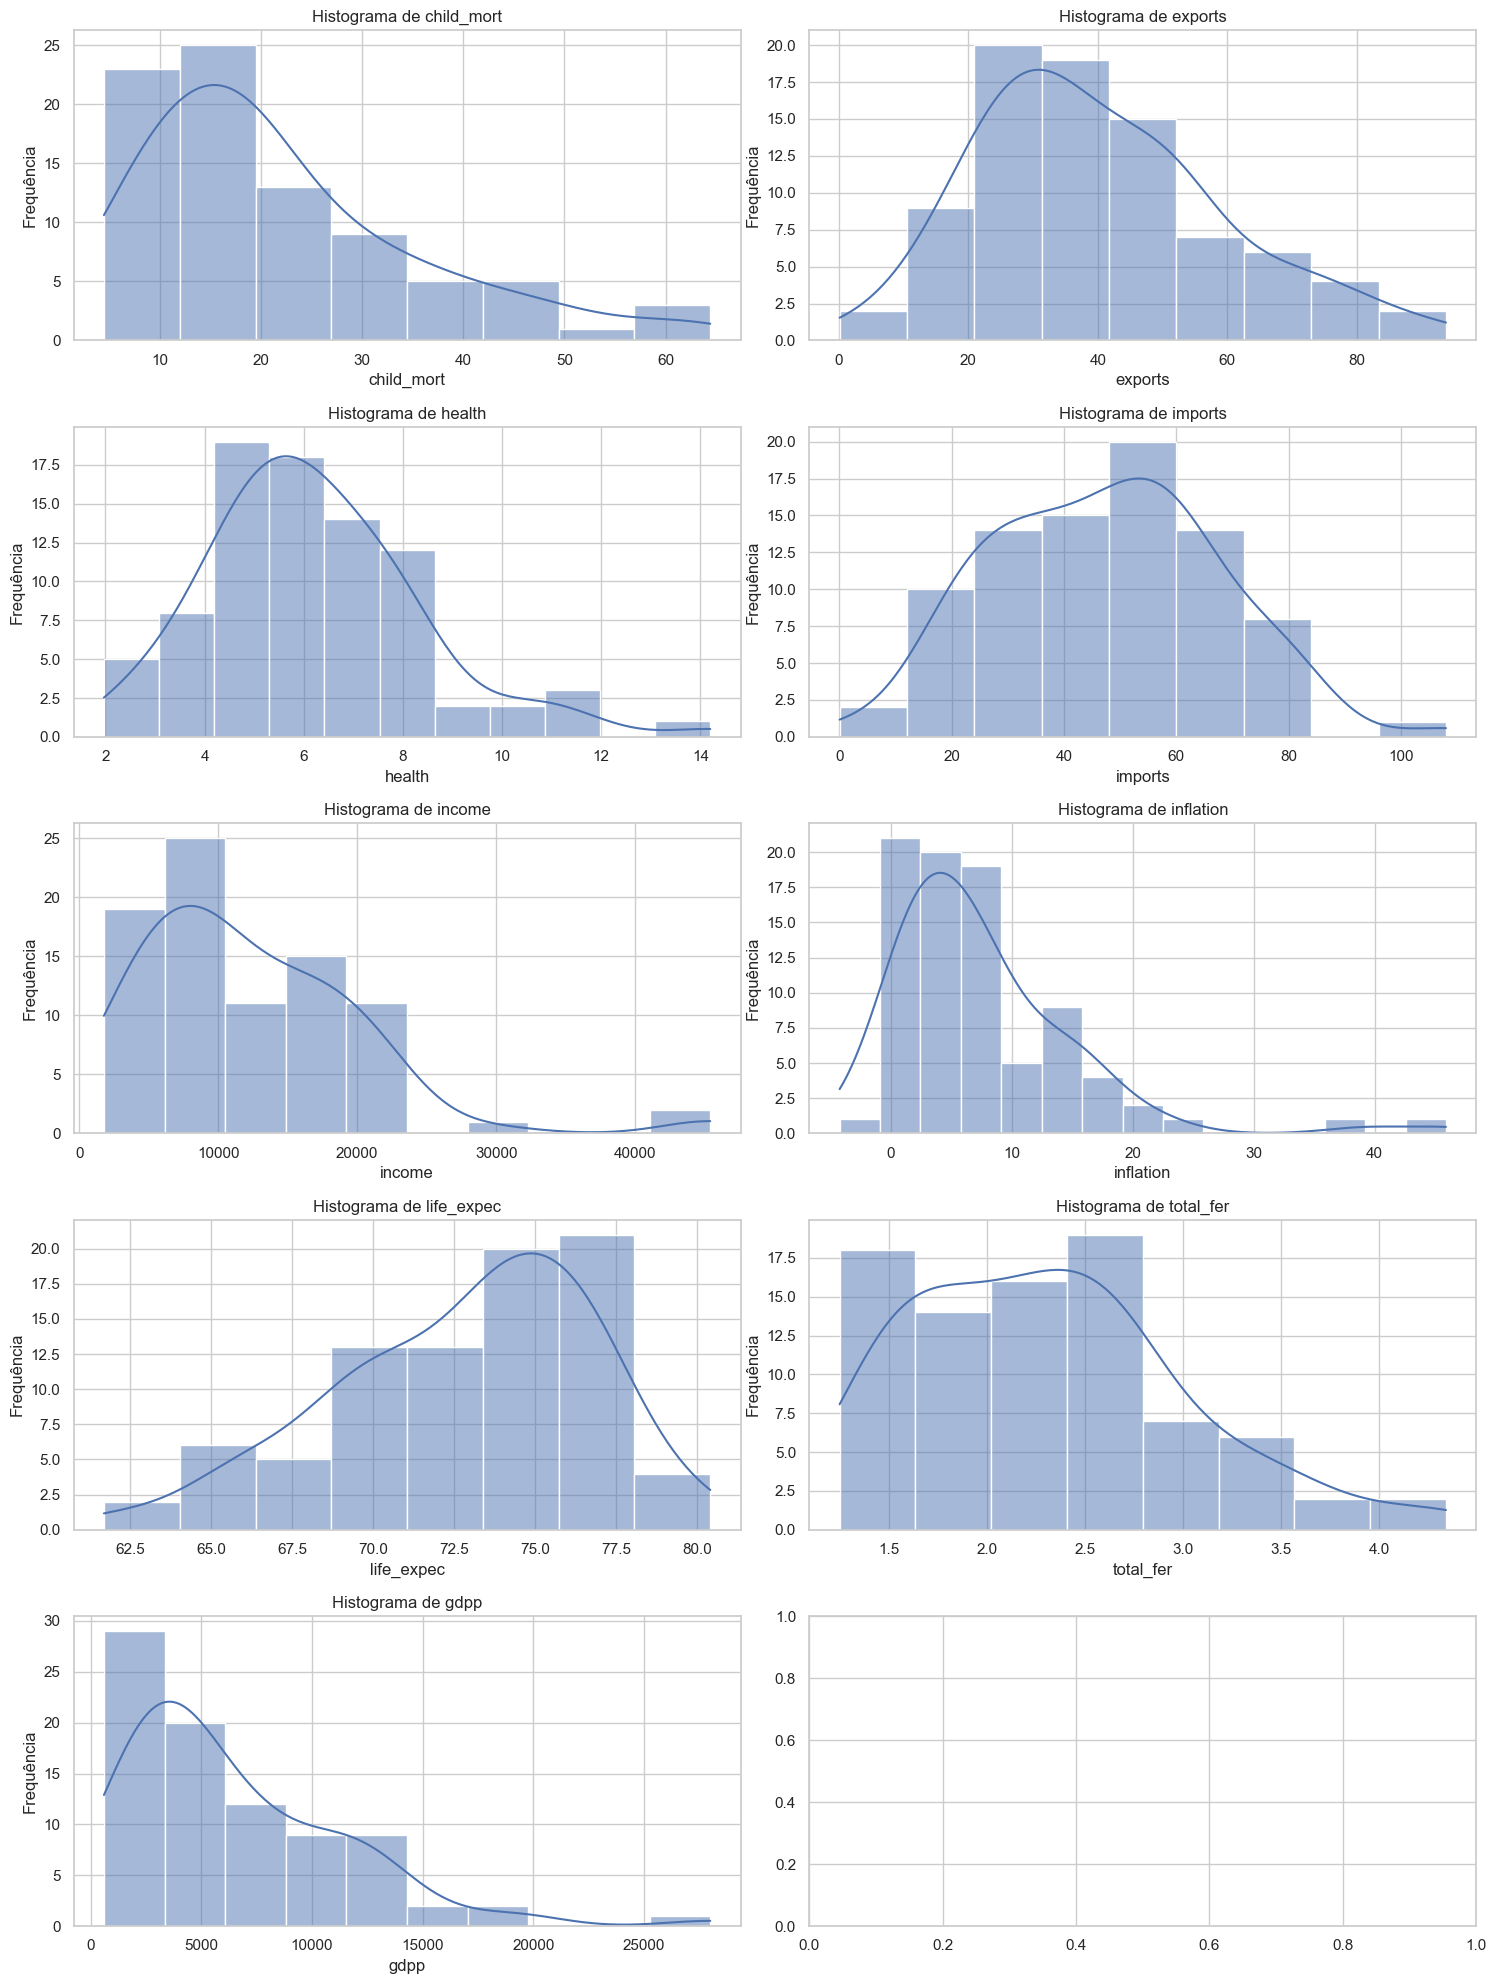

In [ ]:
# Distribuição das features no Cluster 1

plot_histograma(df_custler_1,features_plot_df)

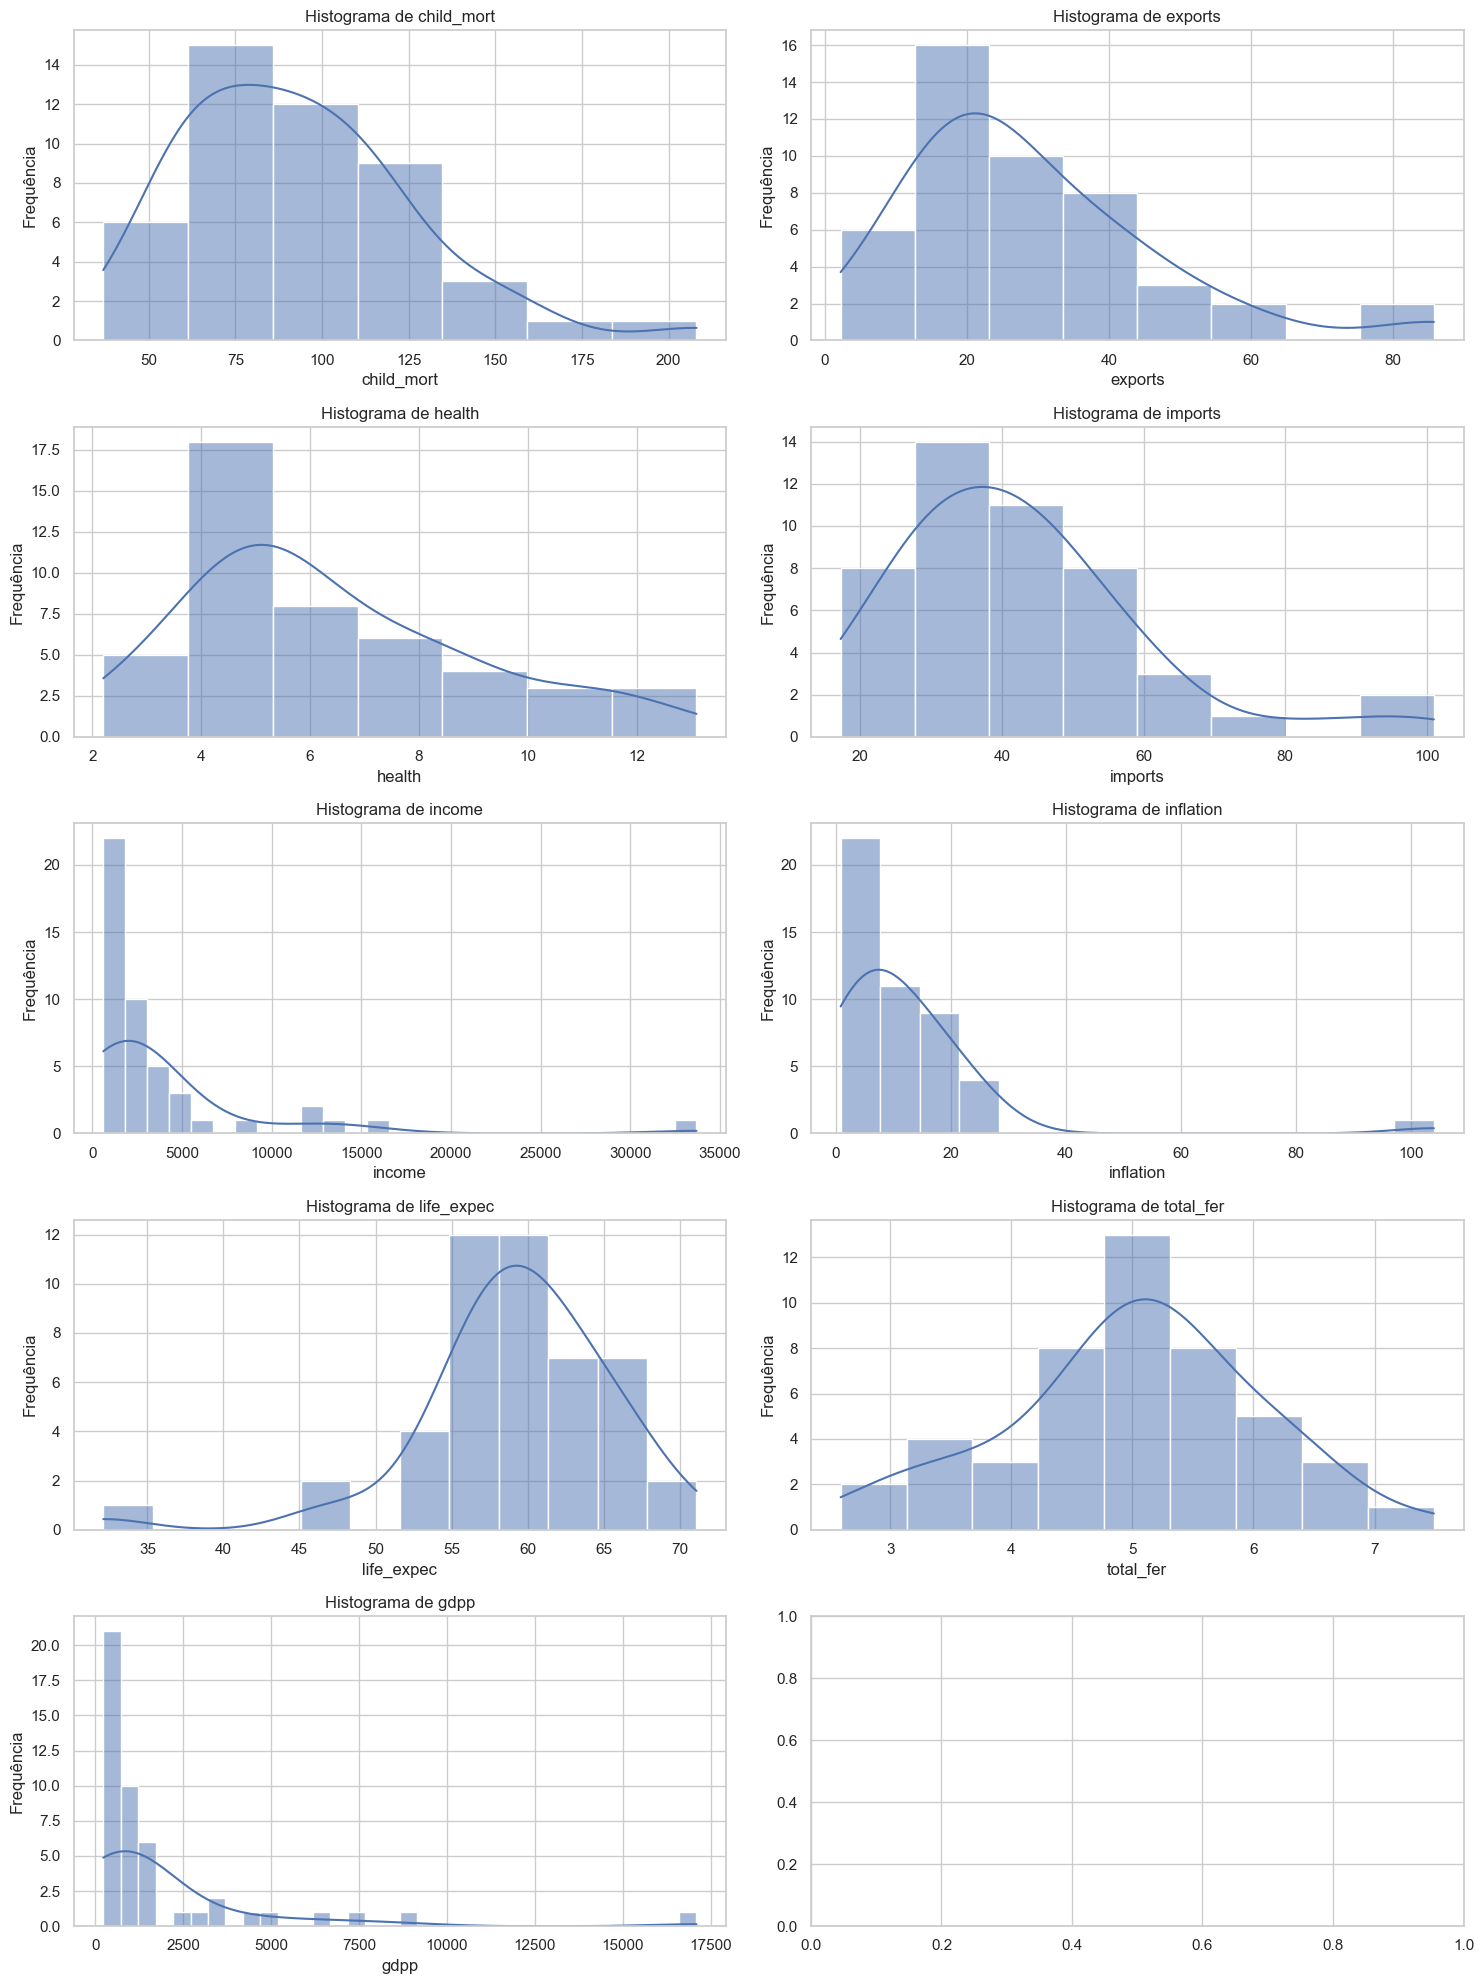

In [ ]:
# Distribuição das features no Cluster 2

plot_histograma(df_custler_2,features_plot_df)

4.4 O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique.

In [ ]:
df_dist = df.copy()
df_dist.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
dist_cent = kmeans.fit_transform(X)**2

dist_cent

c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 13.74546212,   1.17959063,  33.4263992 ],
       [  0.70062052,  12.9766085 ,  10.13805124],
       [  2.0011834 ,   9.81085648,  14.02034427],
       [ 18.69362974,   5.14190122,  38.8766624 ],
       [  1.12898346,  14.60131718,   6.25170839],
       [  4.68689944,  13.60394296,  12.88004434],
       [  1.24345315,  11.65707723,  14.24889347],
       [ 12.78278558,  29.56234093,   4.03043255],
       [ 12.39082446,  31.12141804,   0.88705572],
       [  2.31876275,   9.37581309,  12.6012245 ],
       [  2.84795197,  15.689021  ,   3.650707  ],
       [  4.4662437 ,  19.11499045,   4.10078928],
       [  3.78148766,   8.19768363,  20.7118433 ],
       [  1.5441977 ,  15.03427453,   5.45357583],
       [  1.79323073,  13.89447811,  10.68409766],
       [ 13.49771119,  32.03413802,   1.89804711],
       [  1.28306857,  10.45618685,  11.53362859],
       [ 12.47467979,   2.25665927,  32.3256368 ],
       [  1.51476294,   8.86872905,  13.73036832],
       [  1.49306559,   5.44942

In [ ]:
dist_cent_1 = dist_cent.sum(axis= 1)

dist_cent_1

array([ 48.35145195,  23.81528025,  25.83238414,  62.71219336,
        21.98200903,  31.17088674,  27.14942386,  46.37555906,
        44.39929822,  24.29580033,  22.18767998,  27.68202343,
        32.69101459,  22.03204806,  26.3718065 ,  47.42989633,
        23.27288401,  47.05697585,  24.1138603 ,  22.51520793,
        33.15426869,  24.99309517,  31.21696304,  66.70002001,
        22.86699059,  52.40243919,  60.31116781,  24.00850381,
        47.67002739,  45.65786063,  26.04999786,  80.78702915,
        70.49668061,  23.5604193 ,  28.09509071,  28.42711423,
        35.90815192,  59.99214521,  50.22731614,  30.2645823 ,
        46.01906795,  23.67918655,  29.77984587,  29.06773902,
        50.1694912 ,  21.28630787,  22.14258611,  25.15445688,
        22.28427327,  55.40981873,  44.90664088,  29.15575307,
        24.94261644,  36.91764416,  43.72002309,  33.67615164,
        36.99770061,  25.54335136,  43.11797317,  31.66228098,
        34.33908041,  22.4334713 ,  20.97048878,  47.66

In [ ]:
len(dist_cent_1)

167

In [ ]:
df_dist['dist'] = dist_cent_1

df_dist.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,48.351452
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,23.815280
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,25.832384
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,62.712193
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,21.982009


In [ ]:
df_dist['cluster'] = y_kmeans

df_dist.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,48.351452,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,23.815280,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,25.832384,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,62.712193,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,21.982009,1


In [ ]:
near_0 = df_dist[df_dist['cluster'] == 0]['dist'].min()

near_0

26.700787157224756

In [ ]:
country_cluster_0 = df_dist[(df_dist['dist'] == near_0) & (df_dist['cluster'] == 0)]

country_cluster_0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist,cluster
74,Israel,4.6,35.0,7.63,32.9,29600,1.77,81.4,3.03,30600,26.700787,0


In [ ]:
near_1 = df_dist[df_dist['cluster'] == 1]['dist'].min()

near_1

18.056235976427295

In [ ]:
country_cluster_1 = df_dist[(df_dist['dist'] == near_1) & (df_dist['cluster'] == 1)]

country_cluster_1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist,cluster
143,Suriname,24.1,52.5,7.01,38.4,14200,7.2,70.3,2.52,8300,18.056236,1


In [ ]:
near_2 = df_dist[df_dist['cluster'] == 2]['dist'].min()

near_2

24.802020077251523

In [ ]:
country_cluster_2 = df_dist[(df_dist['dist'] == near_2) & (df_dist['cluster'] == 2)]

country_cluster_2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist,cluster
72,Iraq,36.9,39.4,8.41,34.1,12700,16.6,67.2,4.56,4500,24.80202,2


Podemos adotar como ideia principal, que o país que melhor representar o seu cluster será aquele que apresenta menor distância para o centróide de seu cluster.

Adontando essa premissa e conforme demonstrado no código acima, segue os países que melhores representam seu cluster.

Cluster 0: Iraq

Cluster 1: Suriname

Cluster 2: Israel

4.5 Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados.

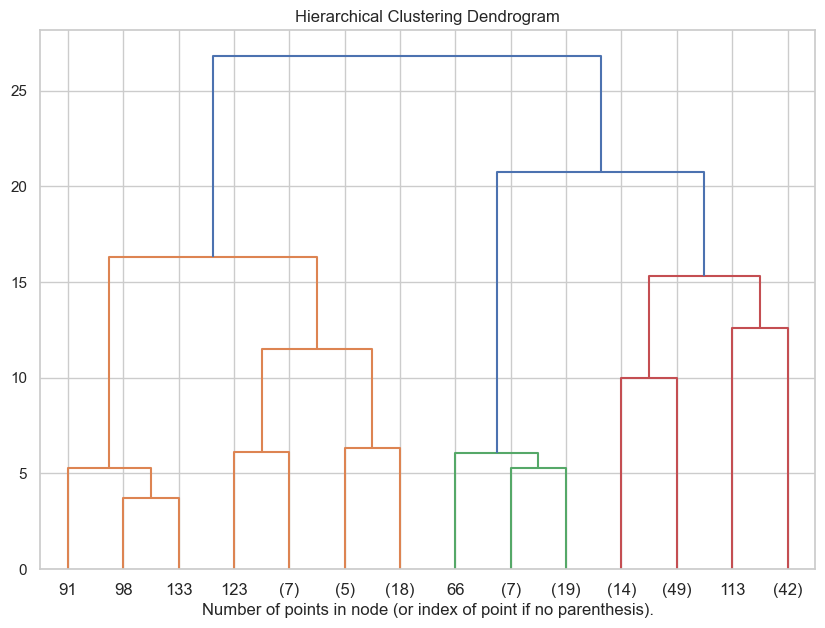

In [ ]:

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

4.6 Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

Podemos adotar como um bom parâmetro para a análise de eficâcia de agrupamento, a métrica da silhueta.

In [ ]:
print(f'Métrica silhueta K-Means: {silhouete_kmeans}')
print(f'Métrica silhueta Hierarchical Clustering: {silhouete_hc}')

Métrica silhueta K-Means: 0.28329575683463126
Métrica silhueta Hierarchical Clustering: 0.24563001303300652


Seguindo essa métrica podemos adotar que o K-Means representa um melhor agrupamento  do que a Clusterização Hierárquica.

Como semelhança dos processos em questão podemos citar:

- Os métodos têm o objetivo de formar grupos com dados semelhantes entre si.

Como diferenças podemos citar:

- K-Means realiza particionamento, onde cada ponto pertence a um cluster específico. Hierarchical Clustering gera uma árvore de clusters (dendrograma) e, portanto, cada ponto pode estar associado a diferentes níveis de agrupamento;
- K-Means requer que você especifique o número de clusters (K) a priori, enquanto o Hierarchical Clustering não exige essa especificação. No Hierarchical Clustering, você obtém uma hierarquia de clusters e pode escolher o número de clusters retroativamente com base em um dendrograma;
- O K-Means é sensível à inicialização dos centroides e pode convergir para diferentes soluções dependendo disso. O Hierarchical Clustering é menos sensível a inicializações;
- Hierarchical Clustering pode ser mais computacionalmente intensivo, especialmente para conjuntos de dados grandes, porque precisa calcular as distâncias entre todos os pares de pontos. K-Means é geralmente mais eficiente em termos computacionais.




4.7	Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

- Escolha do número de Clusters, que é representado pela letra (K):

Antes de aplicar o algoritmo K-Means, é necessário escolher o número de clusters desejado, K. Isso pode ser feito com base na análise exploratória dos dados ou usando métodos como o Método do Cotovelo (Elbow Method) que ajuda a identificar o ponto onde a adição de mais clusters não melhora significativamente a variância intracluster.

- Atribuição de centroides:

Esta atribuição pode ser aleatória ou adicionada previamente. Os centroides são os pontos que representam os centros dos clusters.

- Atribuição dos dados aos Clusters:

Cada ponto(dado) do conjunto é atribuido a um cluster(grupo) cujo centroide é o mais próximo. Isso é feito calculando a distância entre cada ponto e os centroides e atribuindo o ponto ao cluster do centroide mais próximo.

- Recálculo do centróide:

Tomando a média das coordenadas de todos os pontos pertencentes ao cluster é recalculado novos centroides . Os centroides são movidos para o centro geométrico dos novos pontos atribuídos a cada cluster.

- Reatribuição dos dados aos Clusters:

Repetição do passo de atribuição de cluster anterior, utilizando os novos centroides.

- Convergência:

A convergência ocorre quando os centroides não mudam ou mudam muito pouco entre iterações, utilizando as etapas de atribuição de pontos e cálculo de centroides.

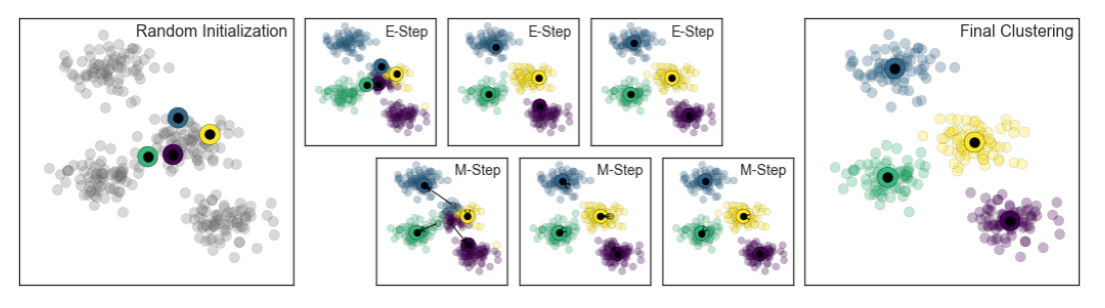

In [ ]:
# Leitura imagem representativa

url_kmeans_pic = (r'K-Means_Pic.png')

imagem = mpimg.imread(url_kmeans_pic)

plt.figure(figsize= (14,8))
plt.imshow(imagem)
plt.axis('off')  # Desativa os eixos
plt.show()

4.8	O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.

Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

In [ ]:
# centroides = kmeans.cluster_centers_

# centroides

In [ ]:
# # medóide = 'tenho que descobrir o array com os três valores com menores distância para adicionado como centroides'

# index_dados = [[72],[143],[74]]

# dfteste = df_1.loc[[72,143,74]]

# dfteste

In [ ]:
# cust_center = dfteste.to_numpy()

# cust_center

In [ ]:
# print(type(centroides))
# print(centroides.shape)
# print(centroides)

In [ ]:
# arr = np.array([1, 2, 3, 4, 5, 4, 4])

# x = np.where(arr == 4)

# print(x)

In [ ]:
# print(type(cust_center))
# print(cust_center.shape)
# print(cust_center)

In [ ]:
# kmeansss = KMeans(init= cust_center, n_clusters= 3).fit(X)

In [ ]:
# teste222 = kmeansss.cluster_centers_

# teste222

In [ ]:
# centroides

4.9 O algoritmo de K-médias é sensível a outliers nos dados. Explique.

Os outliers podem distorcer os centroides (média dos clusters) , levando a uma alocação incorreta dos pontos aos clusters e à formação errônea de clusters.

4.10	Por que o algoritmo de DBScan é mais robusto à presença de outliers?

O DBSCAN define clusters como regiões de alta densidade de pontos. Um cluster é identificado como uma área contínua e de alta densidade. Portanto, os pontos isolados (outliers) não são forçados a pertencer a um cluster específico se não apresentar os parâmetros necessários. Os outliers não pertenceram a nenhum grupo.